✅ Dataset Loaded: 891 rows, 12 columns

📊 Survival Rates by Class & Gender:
Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64

💰 Top 10 Highest Fare Passengers:
                                                Name      Fare Pclass  \
679               Cardeza, Mr. Thomas Drake Martinez  512.3292      1   
258                                 Ward, Miss. Anna  512.3292      1   
737                           Lesurer, Mr. Gustave J  512.3292      1   
88                        Fortune, Miss. Mabel Helen  263.0000      1   
438                                Fortune, Mr. Mark  263.0000      1   
341                   Fortune, Miss. Alice Elizabeth  263.0000      1   
27                    Fortune, Mr. Charles Alexander  263.0000      1   
742            Ryerson, Miss. Susan Parker "Suzette"  262.3750      1   
311               

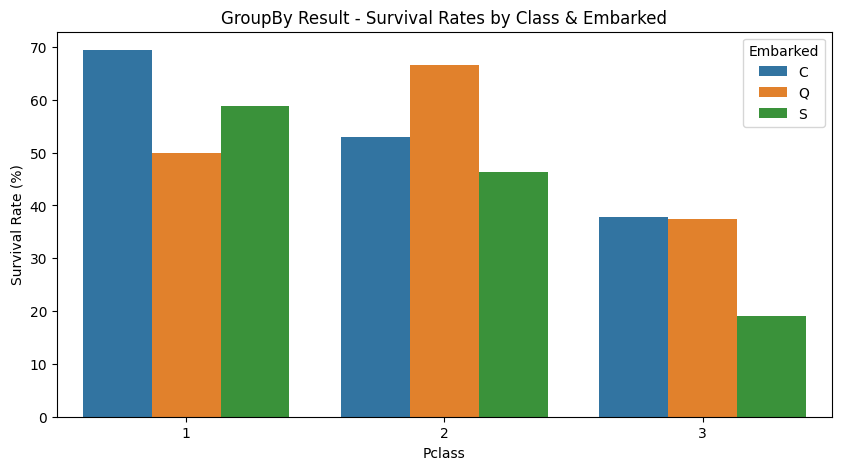

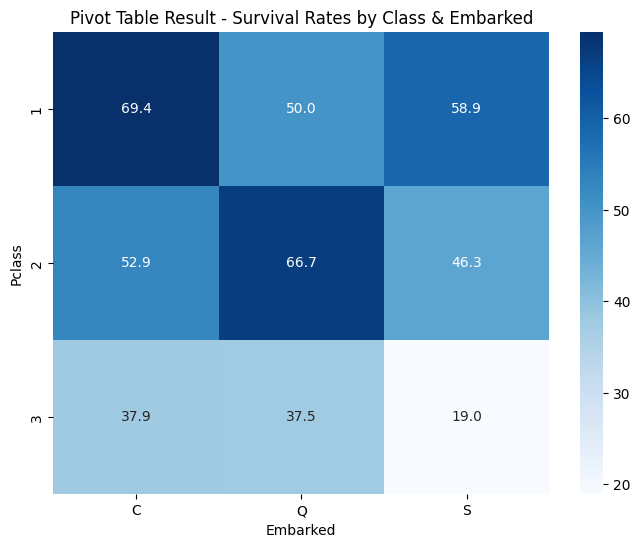

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1. Load Dataset
def load_data(filepath):
    """Loads Titanic dataset and returns a Pandas DataFrame."""
    df = pd.read_csv(filepath)
    print(f"✅ Dataset Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
    return df

# ✅ 2. Data Cleaning & Handling Missing Values
def clean_data(df):
    """Cleans Titanic dataset: fills missing values, removes unnecessary columns, converts types, and engineers features."""

    # Fill missing Age values with median to handle NaNs without being affected by outliers
    df['Age'] = df['Age'].fillna(df['Age'].median())

    # Fill missing Embarked values with the most common value (mode)
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Drop Cabin column due to too many missing values
    df.drop(columns=['Cabin'], inplace=True)

    # Convert categorical columns to 'category' dtype to save memory and clarify intent
    df['Pclass'] = df['Pclass'].astype('category')
    df['Sex'] = df['Sex'].astype('category')
    df['Embarked'] = df['Embarked'].astype('category')

    # Feature Engineering: Extract title (Mr., Mrs., etc.) from Name column
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].astype('category')

    # Feature Engineering: Combine SibSp and Parch into FamilySize feature
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Drop unnecessary columns to keep the dataset clean
    df.drop(columns=['PassengerId', 'Ticket'], inplace=True)

    # Remove duplicate rows if any
    df.drop_duplicates(inplace=True)

    # Reset index after cleaning
    df.reset_index(drop=True, inplace=True)

    return df

# ✅ 3. Exploratory Data Analysis (EDA)
def survival_rates(df):
    """Returns survival rates by class and gender."""
    return df.groupby(['Pclass', 'Sex'], observed=True)['Survived'].mean() * 100

def highest_fares(df):
    """Returns top 10 passengers who paid the highest fares."""
    return df[['Name', 'Fare', 'Pclass', 'Survived']].sort_values(by='Fare', ascending=False).head(10)

def youngest_oldest_survivors(df, min_age=1):
    """Finds youngest and oldest survivors, excluding passengers below a minimum age."""
    survivors = df[(df['Survived'] == 1) & (df['Age'] >= min_age)]
    youngest = survivors.nsmallest(1, 'Age')
    oldest = survivors.nlargest(1, 'Age')
    return youngest[['Name', 'Age', 'Pclass']], oldest[['Name', 'Age', 'Pclass']]

# ✅ 4. Pivot Table for Survival Analysis
def survival_pivot_table(df):
    """Creates a pivot table showing survival rates by class & embarkation port."""
    pivot = df.pivot_table(values='Survived', index='Pclass', columns='Embarked', aggfunc='mean', observed=True) * 100
    return pivot

# ✅ 5. Visualization of GroupBy vs Pivot Table
def compare_groupby_pivot(df):
    # GroupBy result
    groupby_result = df.groupby(['Pclass', 'Embarked'], observed=True)['Survived'].mean().reset_index()
    groupby_result['Survived'] *= 100
    
    # Plot GroupBy result
    plt.figure(figsize=(10,5))
    sns.barplot(data=groupby_result, x='Pclass', y='Survived', hue='Embarked')
    plt.title('GroupBy Result - Survival Rates by Class & Embarked')
    plt.ylabel('Survival Rate (%)')
    plt.show()
    
    # Pivot Table result
    pivot = survival_pivot_table(df)
    plt.figure(figsize=(8,6))
    sns.heatmap(pivot, annot=True, cmap='Blues', fmt=".1f")
    plt.title('Pivot Table Result - Survival Rates by Class & Embarked')
    plt.ylabel('Pclass')
    plt.xlabel('Embarked')
    plt.show()

# ✅ 6. Main Execution
if __name__ == "__main__":
    # Load dataset
    df = load_data("train.csv")

    if df is not None:
        # Clean data
        df = clean_data(df)

        # Run analyses
        print("\n📊 Survival Rates by Class & Gender:")
        print(survival_rates(df))

        print("\n💰 Top 10 Highest Fare Passengers:")
        print(highest_fares(df))

        youngest, oldest = youngest_oldest_survivors(df, min_age=1)
        print("\n👶 Youngest Survivor (Age >= 1):\n", youngest)
        print("\n👴 Oldest Survivor:\n", oldest)

        print("\n📊 Survival Pivot Table:")
        print(survival_pivot_table(df))
        
        print("\n📊 Comparing GroupBy and Pivot Table Visualizations:")
        compare_groupby_pivot(df)
